In [7]:
# 1. Loading Libraries
# Importing  NumPy and Panda
import pandas as pd
import numpy as np

# ---------Import libraries & modules for data visualizaiton
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Importing scit-learn module to split the dataset into train/test sub-datasets
from sklearn.model_selection import train_test_split

# Importing scit-learn module for the algorith/model: Linear Regression
from sklearn.linear_model import LogisticRegression

# Importing sci-Learn module for K-fole cross-validation - algorithm/modle evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Importing scit-learn module fro classification report
from sklearn.metrics import classification_report

In [8]:
# 2. Specifing data file location
filename = 'C:/Data Sets/Iris.csv'

# Loading the data into a Pandas DataFrame
df = pd.read_csv(filename)

In [11]:
# 4 Preprocess Dataset

# 4.1 Cleaning Data: Find & Mark Missing Values
# Zero values cannot be use in these columns

# Marking and updating zero values as missing or NaN
df[['SepalLengthCm', 'SepalWidthCm', 'SepalWidthCm', 'PetalWidthCm']] \
= df[['SepalLengthCm', 'SepalWidthCm', 'SepalWidthCm', 'PetalWidthCm']].replace(0, np.NaN)

# count the number of NaN values in each column
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [12]:
# 5. Performing Exploratory Data Analysis on Dataset

# Get the dimensions or Shape of the dataset

# i.e. number of records/rows x number of variables/columns

print(df.shape)

(150, 6)


In [13]:
# Getting the data types of all the variables/attributes of the data set
# The resutls shows

print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [14]:
#  Getting several records/rows at he top fo the dataset
# Get the first five records

print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [15]:
# Get the summary statistics of the numerica variables/attributes fo the dataset

print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [16]:
# class distribution
# i.e. how many records for each class
# This dataset is a good candidate for the classification issues

print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


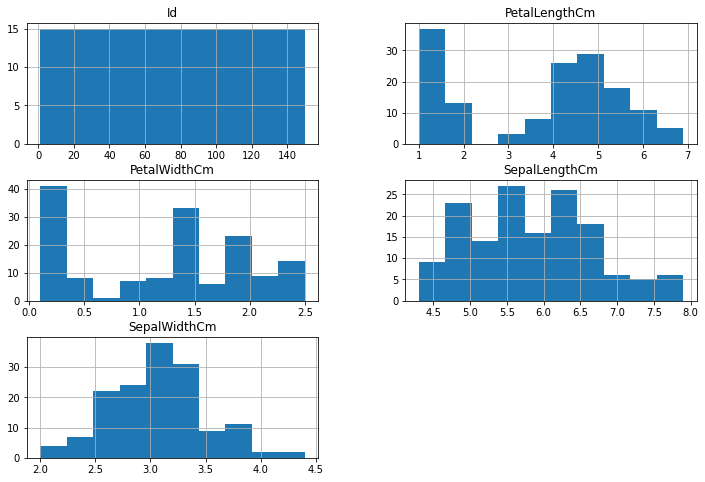

In [17]:
#  Plot historgram for each numerica variable/attribute of the dataset
#  VIP NOTES: The first variable ID is also plotted. However, the plot should be ignored

df.hist(figsize=(12, 8))
pyplot.show()

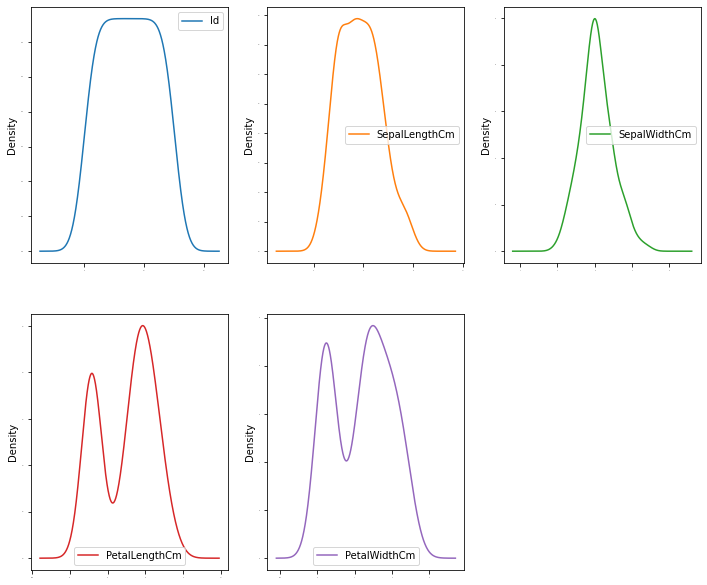

In [19]:
# Density plots
# IMPORTANT NOTES: 5 numerica variables -->> at least 5 plots -->> layout (2, 3): 2 rows, each row with 3 plots

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(12, 16))
pyplot.show()

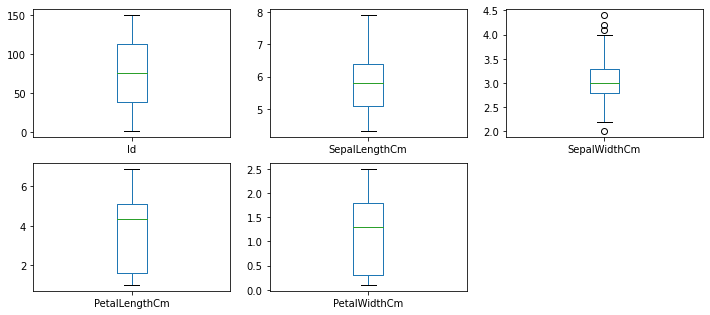

In [20]:
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12, 8))
pyplot.show()

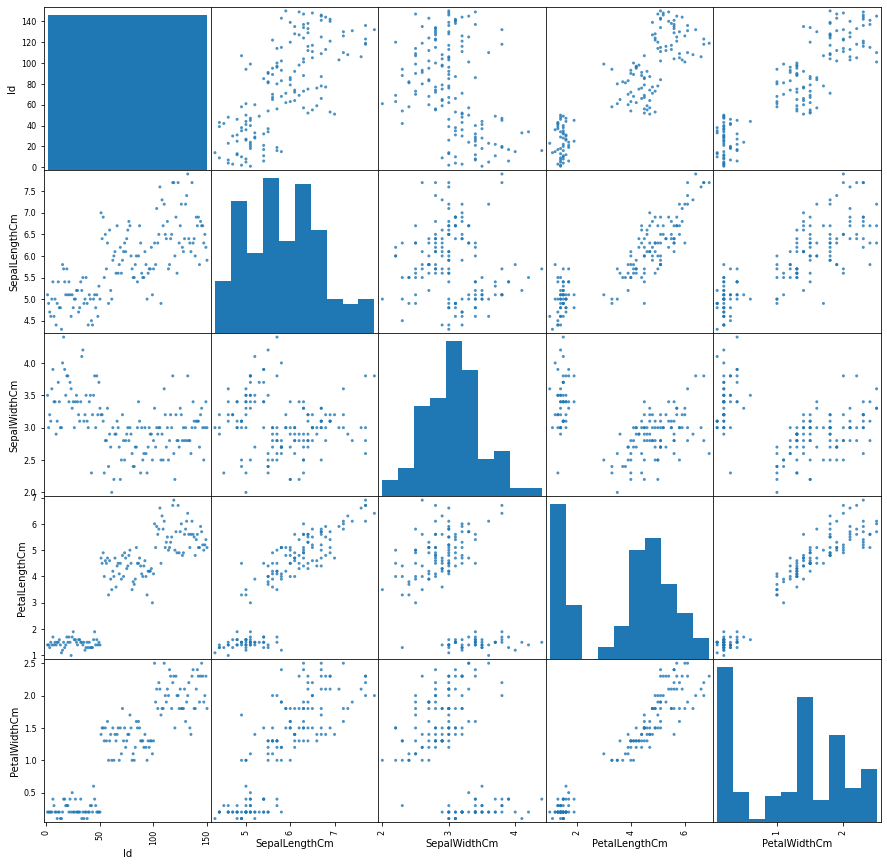

In [21]:
# scatter plot matirx

scatter_matrix(df, alpha=0.8, figsize=(15,15))

pyplot.show()

In [26]:
# Store datafram values into a numpy array
array = df.values
# separate array into input and output components by slicign
# For X (input)[:, 1:5] --> all the rows, columns from 1 -4 (5 - 1)
X = array[:,1:5]

#  For Y (input)[:, 5] --> all the rows, column 5
Y = array[:,5]

In [29]:
#  Splittling the dataset --> training sub-dataset: 67%; test sub-dataset: 33%

test_size = 0.33

# Selection of records to include in which sub-dataset mush be done randomely
# Use this seed for randomizzation

seed = 7

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [34]:
# Building the model
model = LogisticRegression()

# Train the model using the training sub-dataset

model.fit(X_train, Y_train)

# Print the classification report
# Ref: Section 10.2.5 Book: Machine Learning Mastery with Python

predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)

print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



In [36]:
# Finding the Accuracy Leve
# score the accuracy level

result = model.score(X_test, Y_test)

# Print out the results
print(("Accuracy: %.3f%%") % (result*100))


Accuracy: 92.000%


In [37]:
# 10. Classify/Predict

model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)